<h1>Decision Trees and Machine Learning</h1>

<li>Decision trees are tree structures containing rules
<li>The leaf nodes of the tree are the "learned" categories (or threshold values)
<li>A path from the root to a leaf node represents a rule (or a decision path)

<h3>Example: A decision tree with rules on deciding who survived or died on the titanic</h3>
<i>Source: https://en.wikipedia.org/wiki/Decision_tree_learning#/media/File:CART_tree_titanic_survivors.png</i>
<li>To use the tree, enter a person-data object and you'll get an answer</li>
<li>Ex: ("John Brown","Male","30 years old", "3 siblings") Ans: Survived (89% probability)
<li>Ex: ("Jessica Jones", "Female","7 years old", "no siblings") Ans: Survived (73% probability)
<li>Ex: ("Hercules Mulligan", "Male", "2 years old", "20 siblings") Ans: Died (17% probability)
<li>Note that the 17% probability doesn't mean that there is an 83% chance that Mulligan survived!

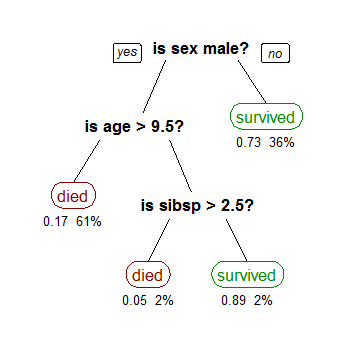

In [1]:
from IPython.display import Image
Image(filename = "Class+11+-+CART_tree_titanic_survivors.png", width=400, height=400)

<h2>Why decision trees?</h2>
<li>Easy to understand 
<li>Rule finding process is transparent
<li>Can handle "mixed" categorical(male/female) and numerical (age, number of siblings) data
<li>Can handle missing data 
<li>Can be used to generate partial "good" solutions

<h2>Why not decision trees?</h2>
<li>Finding an optimal tree is a hard problem
<li>Overfitting is a HUGE problem

<h2>Types of decision trees</h2>
<ul>
<li><b>Classification trees</b>: Uses rules to classify cases into two or more categories (Rocks vs Mines)
<ul>
<li>Classification trees recursively split the data on a feature value
<li>Each split minimizes the entropy (also known as the impurity)
<li>Entropy is commonly measured using the GINI cost function (a measure of the probability of misclassification or 'purity')
</ul>
<li><b>Regression trees</b>: Uses rules to group data into target variable ranges (Wine Quality)
<ul>
<li>Also split the data on feature values
<li>Minimize cost (impurity). Usually the mean squared error
</ul>
</ul>

<h3>Stopping and Pruning Rules</h3>
<li>A minimum count of observations in each leaf node
<li>A maximum tree <b>depth</b>
<li>A maximum <b>complexity</b> (the number of splits)
<li>Using all three, you won't necessarily have a balanced tree

<h2>Predicting wine quality using a decision tree</h2>

<h3>Import the data</h3>

In [ ]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
import pandas as pd
from pandas import DataFrame
w_df = pd.read_csv(url,header=0,sep=';')

<h4>Examining the dependent variable</h4>

In [ ]:
w_df['quality'].unique()

<li>Higher dv values indicate a better quality wine
<li>Lower dv values indicate a poorer quality wine
<li>We'll assume that the values are continuous
<li>And use the various features to predict wine quality

<h4>Build train and test samples</h4>

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(w_df, test_size = 0.3)
x_train = train.iloc[0:,0:11]
y_train = train[['quality']]
x_test = test.iloc[0:,0:11]
y_test = test[['quality']]
y_test

<h3>Classifiers vs Regressors</h3>
<li>Decision tree regressors are used when the target variable is continuous and ordered (wine quality from 0 to 10)
<li>Classifiers are used when the target variable is a set of unordered categories (rocks or mines)

<h4>For wine quality, we need a regressor</h4>

In [ ]:
#from sklearn.tree import DecisionTreeRegressor
#model = DecisionTreeRegressor(max_depth = 3)
from sklearn import tree
model = tree.DecisionTreeRegressor(max_depth=3)
model.fit(x_train,y_train)

Details: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [ ]:
#Get the R-Square for the predicted vs actuals on the text sample
print("Training R-Square",model.score(x_train,y_train))
print("Testing R-Square",model.score(x_test,y_test))

<h2>View the tree</h2>

<h3>Download and install <a href="http://www.graphviz.org/download/">graphviz</a></h3>

In [ ]:
!pip install graphviz

If you are having issues using Graphviz in Windows, then try the following steps:
<ol>
<li>1. Install Graphviz 
<li>2. After installing graphviz, add it to the Computer's Path. 
<ul>
<li>Go to PC properties 
<li> Click environment variables in the advanced settings section
<li> Add C:\Program Files (x86)\Graphviz2.38\bin\ to the PATH and click Apply
</ul>
<li> Install Pydotplus. <b>Note that you will always have to install pydot after graphviz as Pydot is Graphviz's dot language and needs Graphviz for reference</b>. 
</ol>
<h3>Install pydotplus (using pip): Install graphviz before you install pydotplus!</h3> 

In [ ]:
!pip install pydotplus --upgrade

In [ ]:
#import pydotplus 
feature_names = [key for key in w_df if not key=='quality']
from IPython.display import Image
dot_data = tree.export_graphviz(model, out_file=None,feature_names=feature_names)
import pydotplus

graph = pydotplus.graphviz.graph_from_dot_data(dot_data)

Image(graph.create_png())


<h3>Decision trees are Entropy minimizers</h3>
<li><b>Entropy</b>: a measure of uncertainty in the data<p>
<ul>
<li>what is the uncertainty in color when you draw a marble from a box of 100 blue marbles?
<li>what is the uncertainty when you draw a marble from a box with 50 blue and 50 red marbles?
</ul>
<li>Entropy minimization: decision tree algorithms seek to partition the data on features in the way that total entropy is minimized

<h2>The danger of entropy minimization</h2>
<li>In the degenerate case, we can build rules that partition the data into single case subsets
<li>The resulting combined entropy will be zero!
<li>But the results will be useless because we will likely not be able to predict anything if we get a new case


<h2>Example</h2>
<li>Feature set = {SSN,GENDER,GRE}
<li>DV = {GPA}
<li>Output rules:
<ul>
<li>if SSN = x1 then 3.2
<li>if SSN = x2 then 4.2
<li>One rule for each SSN in our training dataset
</ul>
<li>This will be totally useless in predicting what a the gpa of a new student is likely to be

<h3>Regression trees</h3>
<li>Run regressions for each X to the dependent variable
<li>Pick the variable with the most explanatory power and split it at several points
<li>Calculate the Mean Square Error of each of the two halves for each split
<li>Pick the split point that gives the lowest mse (combined)

<h1>Classification trees</h1>
<h2>Classification trees are used when dealing with categorical dependent variables</h2>
<li>Pick a variable and a split point so that the misclassification cost is the lowest.

<h3>Rocks and mines data set</h3>

In [ ]:
import pandas as pd
import numpy as np
from pandas import DataFrame
url="https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"
df = pd.read_csv(url,header=None)
df[60]=np.where(df[60]=='R',0,1)
df.describe()

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.3)
x_train = train.iloc[0:,0:60]
y_train = train[[60]]
x_test = test.iloc[0:,0:60]
y_test = test[[60]]
y_train

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model = tree.DecisionTreeClassifier(max_depth = 3,criterion='entropy')
model.fit(x_train,y_train)

In [ ]:
import pydotplus 
from IPython.display import Image
feature_names = [key for key in df if not key == 60]
dot_data = tree.export_graphviz(model, out_file=None,feature_names=feature_names) 

graph = pydotplus.graphviz.graph_from_dot_data(dot_data)

Image(graph.create_png())

In [ ]:
# [[tn, fp]
#  [fn, tp]]
from sklearn.metrics import confusion_matrix
p_train=model.predict(x_train)
p_test = model.predict(x_test)
print(confusion_matrix(p_train,np.array(y_train)))
print(confusion_matrix(p_test,np.array(y_test)))

In [ ]:
from sklearn.metrics import roc_curve,auc
import pylab as pl
%matplotlib inline
(fpr, tpr, thresholds) = roc_curve(y_test,p_test)
area = auc(fpr,tpr)
pl.clf() #Clear the current figure
pl.plot(fpr,tpr,label="Out-Sample ROC Curve with area = %1.2f"%area)

pl.plot([0, 1], [0, 1], 'k') #This plots the random (equal probability line)
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('In sample ROC rocks versus mines')
pl.legend(loc="lower right")
pl.show()


In [ ]:
fpr,tpr,thresholds

<h1>Random forests</h1>
<li>Build many decision trees from the data set
<li>Let them "vote" on how to classify inputs


<h2>Ensemble learning random forests</h2>
<li>Use a random subset of features and choose the feature to split on from this subset
<li>Repeat the process, this gives multiple different trees (the ensemble)
<li>The model then predicts y values by letting the trees vote 
<ul>
<li>The forest is given a case
<li>Each tree decides which class the case belongs to
<li>Votes are tallied
<li>The highest vote wins
</ul>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10)
#np.ravel flattens the pandas Series into an np array. That's what the classifier needs
model.fit(x_train,np.ravel(y_train))

<h3>Accuracy</h3>
<li>The "score" function returns the accuracy of the model (percentage correctly classified)

In [ ]:
model.score(x_test,y_test)

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cfm = confusion_matrix(np.ravel(y_test),y_pred)
cfm

<h2>Feature importance</h2>
<li>Since ensemble methods are picking different features in different trees, they can provide us with an estimate of feature importance
<li>For each feature, the model calculates by how much entropy decreases (net across levels) by selecting it

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
importances = model.feature_importances_
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.barh(range(len(indices)), importances, color='b', align='center')
dummy = plt.yticks(range(len(indices)),feature_names)
# Sorted
#indices = np.argsort(importances)
#plt.barh(range(len(indices)), importances[indices], color='b', align='center')
#dummy = plt.yticks(range(len(indices)),indices)

<h3>Finding the best ensemble</h3>
<li>Using a gridsearch, we can run the random forest classifier on various parameter combinations
<li>And then use the classifier with the best accuracy score

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {
     'n_estimators':(10, 30, 50), #the number of trees
     'max_depth':(4,5,6,8,10,15),
     'min_samples_split': (2, 4, 8),
     'min_samples_leaf': (4,8,12,16)
}

model = GridSearchCV(RandomForestClassifier(),parameters,cv=3,iid=False)
model.fit(x_train, np.ravel(y_train))
model.best_score_, model.best_params_

In [ ]:
b_model = RandomForestClassifier(max_depth=15,min_samples_leaf=12,min_samples_split=4,n_estimators=50)
b_model.fit(x_train,np.ravel(y_train))
from sklearn.metrics import confusion_matrix
y_pred = b_model.predict(x_test)
cfm = confusion_matrix(np.ravel(y_test),y_pred)
cfm

<h2>Bootstrapping / Bagging</h2>
<li>Create a synthetic dataset by drawing sample cases "with replacement" from the training set
<li>Run the decision tree algorithm on this dataset
<li>Repeat on multiple such synthetic datasets
<li>Let the many trees vote on the class for each case

In [ ]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier()
model.fit(x_train,np.ravel(y_train))

In [ ]:
model.score(x_test,y_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {
     'n_estimators':(30, 50), #the number of trees
     'max_samples':(30,40,50),
     'max_features':(5,10,20),  
}

model = GridSearchCV(BaggingClassifier(),parameters,cv=3,iid=False)
model.fit(x_train, np.ravel(y_train))
model.best_score_, model.best_params_

In [ ]:
model=BaggingClassifier(max_features=5,max_samples=10,n_estimators=30)
model.fit(x_train,np.ravel(y_train))
model.score(x_test,y_test)

<h2>Why random forests?</h2>
<li>Can deal with missing data
<ul>
<li>If a feature is missing from a case, that case is discarded when a feature is considered for inclusion in the tree
<li>In ensemble learning, since we're working with subsets of the features, every feature will figure in some tree or the other (and will have a vote)
</ul>
<li>Useful when the data available is small

<h2>Why not random forests?</h2>
<li>Danger of overfitting, especially when the sample is small or when the number of classes is small
<li>Can't explain the results. The rules are opaque since many trees are voting